In [102]:
import matplotlib.pyplot as plt
import time
import numpy as np
from constantes import *
from main import *
from bt import *
from pl import *
from gd import *
import random
from itertools import combinations
import statsmodels.api as sm

In [103]:
def medir_tiempo_ejecucion(metodo, ruta, archivos):
    tiempos = []

    print(archivos)

    for archivo in archivos:
        print("Archivo:", archivo)
        maestros, habilidades, k = leer_archivo(archivo,ruta)

        start_time = time.time()

        if metodo == PROGRAMACION_LINEAL:
            grupos, coeficiente = pl.p_opt_tribu_agua_pl(maestros, habilidades, k)
        elif metodo == BACKTRACKING:
            grupos, coeficiente = bt.p_opt_tribu_agua_bt(maestros, habilidades, k)
        elif metodo == GREEDY:
            grupos, coeficiente = gd.p_opt_tribu_agua_gd(maestros, habilidades, k)
        else:
            raise ValueError("Método no reconocido. Use 'pl' para programación lineal o 'bt' para backtracking.")

        end_time = time.time()
        execution_time = end_time - start_time

        print("Tiempo de ejecución:", execution_time)
        tiempos.append(execution_time)
    
    return tiempos

In [104]:
def generar_datos_prueba(n, max_habilidad=1000):
    maestros = [f"Maestro {i+1}" for i in range(n)]
    habilidades = [random.randint(1, max_habilidad) for _ in range(n)]
    return maestros, habilidades

In [105]:
def medir_tiempo_ejecucion(algoritmo, maestros, habilidades, k, num_repeticiones=3):
    tiempos = []
    for _ in range(num_repeticiones):
        start_time = time.time()
        algoritmo(maestros, habilidades, k)
        end_time = time.time()
        tiempos.append(end_time - start_time)
    return np.mean(tiempos)

In [106]:
def grafico_comparativo_bt_pl_gd(max_maestros, max_grupos):
    tamanios_problema = np.arange(1, max_maestros + 1)
    archivos = [f"PRUEBA_{i+1}" for i in range(max_maestros)]

    tiempos_bt = []
    tiempos_pl = []  # Placeholder for Programación Lineal tiempos
    tiempos_gd = []  # Placeholder for Greedy tiempos

    for n in tamanios_problema:
        maestros, habilidades = generar_datos_prueba(n)
        
        tiempo_bt = medir_tiempo_ejecucion(p_opt_tribu_agua_bt, maestros, habilidades, 3)  # k = 3, ejemplo
        tiempos_bt.append(tiempo_bt)

        tiempo_pl = medir_tiempo_ejecucion(p_opt_tribu_agua_pl, maestros, habilidades, 3)  # Placeholder
        tiempos_pl.append(tiempo_pl)

        tiempo_gd = medir_tiempo_ejecucion(p_opt_tribu_agua_gd, maestros, habilidades, 3)  # Placeholder
        tiempos_gd.append(tiempo_gd)

    plt.figure(figsize=(12, 8))
    plt.plot(tamanios_problema, tiempos_bt, label='Backtracking',color='blue')
    plt.plot(tamanios_problema, tiempos_pl, label='Programación Lineal',color='red')  # Placeholder
    plt.plot(tamanios_problema, tiempos_gd, label='Greedy',color='green')  # Placeholder
    plt.xlabel('Tamaño del problema')
    plt.ylabel('Tiempo de ejecución (s)')
    plt.title('Comparación de tiempos de ejecución')
    plt.legend()
    plt.grid(True)
    plt.show()

grupos finales: [[], [], ['Maestro 1']]
grupos finales: [[], [], ['Maestro 1']]
grupos finales: [[], [], ['Maestro 1']]
grupos finales: [[], ['Maestro 2'], ['Maestro 1']]
grupos finales: [[], ['Maestro 2'], ['Maestro 1']]
grupos finales: [[], ['Maestro 2'], ['Maestro 1']]
grupos finales: [['Maestro 2'], ['Maestro 1'], ['Maestro 3']]
grupos finales: [['Maestro 2'], ['Maestro 1'], ['Maestro 3']]
grupos finales: [['Maestro 2'], ['Maestro 1'], ['Maestro 3']]
grupos finales: [['Maestro 1'], ['Maestro 4'], ['Maestro 2', 'Maestro 3']]
grupos finales: [['Maestro 1'], ['Maestro 4'], ['Maestro 2', 'Maestro 3']]
grupos finales: [['Maestro 1'], ['Maestro 4'], ['Maestro 2', 'Maestro 3']]
grupos finales: [['Maestro 5', 'Maestro 3'], ['Maestro 2'], ['Maestro 1', 'Maestro 4']]
grupos finales: [['Maestro 5', 'Maestro 3'], ['Maestro 2'], ['Maestro 1', 'Maestro 4']]
grupos finales: [['Maestro 5', 'Maestro 3'], ['Maestro 2'], ['Maestro 1', 'Maestro 4']]
grupos finales: [['Maestro 4', 'Maestro 1'], ['Maest

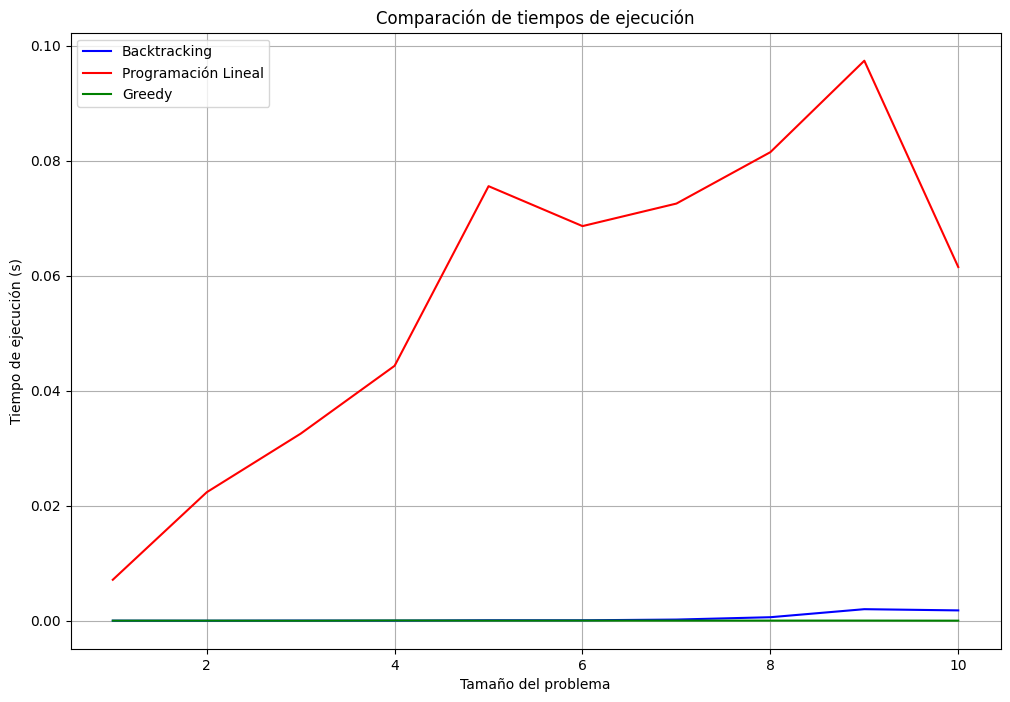

In [107]:
# Ejecutar la medición de tiempos con un máximo de 10 maestros y 3 grupos
grafico_comparativo_bt_pl_gd(10, 3)

# Graficar Relación R(I)

In [108]:
def generar_datos_aleatorios(n, max_habilidad=100):
    maestros = list(range(n))
    habilidades = np.random.randint(1, max_habilidad+1, n)
    return maestros, habilidades

In [109]:
def p_opt_tribu_agua_exacto(maestros, habilidades, k):
    n = len(maestros)
    mejor_coeficiente = float('inf')
    mejor_grupos = []

    for comb in combinations(range(n), k-1):
        indices_cortes = [0] + list(comb) + [n]
        grupos = []
        coeficiente = 0

        for i in range(len(indices_cortes)-1):
            grupo = maestros[indices_cortes[i]:indices_cortes[i+1]]
            habilidad_grupo = sum(habilidades[indices_cortes[i]:indices_cortes[i+1]])
            coeficiente += habilidad_grupo**2
            grupos.append(grupo)

        if coeficiente < mejor_coeficiente:
            mejor_coeficiente = coeficiente
            mejor_grupos = grupos

    return mejor_grupos, mejor_coeficiente


In [110]:
resultados_optimos = [
    1894340,
    1640690,
    807418,
    4298131,
    385249,
    355882,
    172295,
    2906564,
    15659106,
    15292055,
    10694510,
    4311889,
    6377225,
    15974095,
    11513230,
    5427764,
    10322822,
    11971097,
    21081875,
    16828799,
    11417428
]

archivos = [
    PRUEBA_1,
    PRUEBA_2,
    PRUEBA_3,
    PRUEBA_4,
    PRUEBA_5,
    PRUEBA_6,
    PRUEBA_7,
    PRUEBA_8,
    PRUEBA_9,
    PRUEBA_10,
    PRUEBA_11,
    PRUEBA_12,
    PRUEBA_13,
    PRUEBA_14,
    PRUEBA_15,
    PRUEBA_16,
    PRUEBA_17,
    PRUEBA_18,
    PRUEBA_19,
    PRUEBA_20,
    PRUEBA_21
]

In [111]:
def graficar_relacion(ruta, archivos):
    aproximaciones = []
    optimos = []
    relaciones = []
    instancias = [i for i in range(1, len(archivos) + 1)]

    for archivo in archivos:
        maestros, habilidades, k = leer_archivo(archivo, ruta)
        _, coef_aprox = p_opt_tribu_agua_gd(maestros, habilidades, k)
        _, coef_opt = p_opt_tribu_agua_exacto(maestros, habilidades, k)

        aproximaciones.append(coef_aprox)
        optimos.append(coef_opt)
        relaciones.append(coef_aprox / coef_opt)

    plt.figure(figsize=(12, 6))

    # Primer gráfico
    plt.subplot(1, 2, 1)
    plt.plot(instancias, aproximaciones, label='Aproximación', marker='o')
    plt.plot(instancias, optimos, label='Óptimo', marker='x')
    plt.xlabel('Instancia')
    plt.xticks(instancias)
    plt.ylabel('Coeficiente (suma de cuadrados)')
    plt.legend()
    plt.title('Comparación entre Aproximación y Solución Óptima')

    # Segundo gráfico con relación y línea de regresión
    plt.subplot(1, 2, 2)
    plt.plot(instancias, relaciones, label='Relación Aproximación/Óptimo', marker='o', color='green')

    # Ajuste del modelo de regresión lineal con statsmodels
    X = sm.add_constant(instancias)
    y = relaciones
    model = sm.OLS(y, X).fit()
    y_pred = model.predict(X)
    plt.plot(instancias, y_pred, color='red', linestyle='--', label='Línea de Regresión (OLS)')

    plt.xlabel('Instancia')
    plt.xticks(instancias)
    plt.ylabel('Relación')
    plt.legend()
    plt.title('Relación entre Aproximación y Solución Óptima')

    plt.tight_layout()
    plt.show()


grupos finales: [['Wei', 'Pakku I'], ['Yakone', 'Yue', 'Pakku']]
grupos finales: [['Wei', 'Hasook'], ['Senna', 'Hama I'], ['Hama', 'Wei I']]
grupos finales: [['Sura'], ['Hama', 'Sangok', 'Ming-Hua'], ['Eska'], ['Huu']]
grupos finales: [['Hama', 'Unalaq', 'Amon', 'Tonraq'], ['Katara', 'Rafa'], ['Misu', 'Hasook']]
grupos finales: [['Eska', 'Wei', 'Amon'], ['Sura', 'Siku', 'La', 'Tonraq'], ['Sangok', 'Yue', 'Pakku']]
grupos finales: [['Amon'], ['Kya'], ['Katara'], ['Desna'], ['Tho'], ['Rafa'], ['Ming-Hua'], ['Senna'], ['Sura'], ['Unalaq']]
grupos finales: [['Misu', 'Hasook', 'Siku II', 'Hama'], ['Misu I', 'Kya', 'Pakku'], ['Tonraq', 'Siku'], ['Siku I'], ['Yakone']]
grupos finales: [['Sangok', 'Misu', 'Katara', 'Wei'], ['Sangok I', 'Rafa', 'Tonraq I', 'Eska II', 'Hama'], ['Huu', 'Kuruk', 'Tonraq', 'Eska I', 'Eska']]
grupos finales: [['Unalaq', 'Kuruk'], ['Ming-Hua I', 'Kuruk I'], ['Ming-Hua', 'Wei'], ['Siku', 'Desna'], ['Misu I', 'Senna', 'Kya'], ['Amon', 'Misu', 'La']]
grupos finales: [['

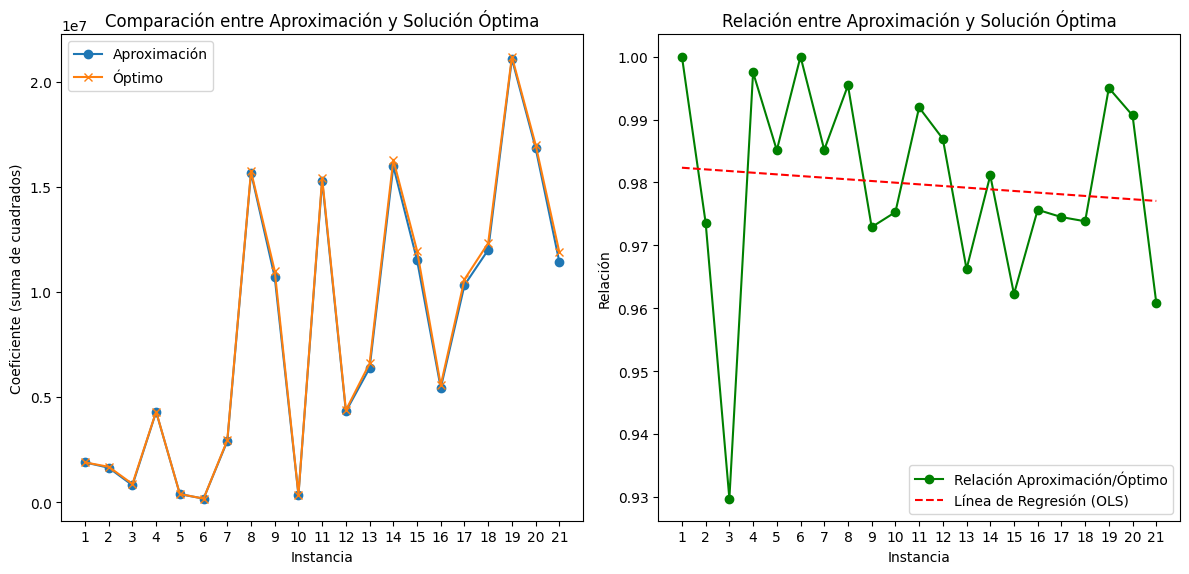

In [112]:
graficar_relacion(CARPETA,archivos)

# Graficos Relacion Set Aleatorio

In [113]:
def generar_instancia_aleatoria(num_maestros, num_habilidades, k):
    maestros = list(range(num_maestros))
    habilidades = [random.randint(1, 100) for _ in range(num_habilidades)]
    return maestros, habilidades, k

In [117]:
def graficar_relacion_aleatoria(num_instancias, num_maestros, num_habilidades, k):
    aproximaciones = []
    optimos = []
    relaciones = []
    instancias = [i for i in range(1, num_instancias + 1)]

    for instancia in range(1, num_instancias + 1):
        maestros, habilidades, k_actual = generar_instancia_aleatoria(num_maestros, num_habilidades, k)
        _, coef_aprox = p_opt_tribu_agua_gd(maestros, habilidades, k_actual)
        _, coef_opt = p_opt_tribu_agua_exacto(maestros, habilidades, k_actual)

        aproximaciones.append(coef_aprox)
        optimos.append(coef_opt)
        relaciones.append(coef_aprox / coef_opt)

    plt.figure(figsize=(12, 6))

    # Primer gráfico
    plt.subplot(1, 2, 1)
    plt.plot(instancias, aproximaciones, label='Aproximación', marker='o')
    plt.plot(instancias, optimos, label='Óptimo', marker='x')
    plt.xlabel('Instancia')
    plt.xticks(instancias)
    plt.ylabel('Coeficiente (suma de cuadrados)')
    plt.legend()
    plt.title('Comparación entre Aproximación y Solución Óptima')

    # Segundo gráfico con relación
    plt.subplot(1, 2, 2)
    plt.plot(instancias, relaciones, label='Relación Aproximación/Óptimo', marker='o', color='green')
    plt.xlabel('Instancia')
    plt.xticks(instancias)
    plt.ylabel('Relación')
    plt.legend()
    plt.title('Relación entre Aproximación y Solución Óptima')

    plt.tight_layout()
    plt.show()

grupos finales: [[4, 14, 2, 7], [9, 13, 5, 3], [15, 12, 11], [1, 8, 10], [16, 6, 0]]
grupos finales: [[5, 15, 14, 13], [9, 7, 11, 6], [0, 12, 3], [16, 10, 4], [1, 2, 8]]
grupos finales: [[6, 14, 0], [3, 5, 2], [1, 4, 16], [8, 13, 15, 7], [11, 10, 9, 12]]
grupos finales: [[3, 5, 13], [11, 15, 16, 6], [10, 12, 1], [4, 8, 9, 7], [2, 14, 0]]
grupos finales: [[3, 2, 15], [11, 6, 12], [7, 9, 16], [4, 14, 13, 10], [0, 5, 8, 1]]
grupos finales: [[16, 9], [8, 12, 14, 13], [2, 3, 6, 0, 7], [15, 4, 5], [1, 10, 11]]
grupos finales: [[15, 10, 12], [16, 0, 3], [14, 7, 2, 4], [5, 9, 1, 11], [6, 13, 8]]
grupos finales: [[0, 14, 4, 1], [12, 2, 15], [13, 8, 9], [16, 10, 7, 3], [6, 5, 11]]
grupos finales: [[11, 13, 5, 14], [16, 7, 9], [8, 3, 6], [0, 10, 12, 2], [1, 4, 15]]
grupos finales: [[5, 4, 6], [1, 14, 10], [15, 3, 0], [8, 13, 11, 7], [16, 2, 9, 12]]
grupos finales: [[12, 5, 14, 6], [0, 15, 4, 10], [9, 11, 8], [16, 2, 13], [7, 3, 1]]
grupos finales: [[16, 9, 1], [11, 14, 0], [4, 12, 8, 7], [2, 15, 

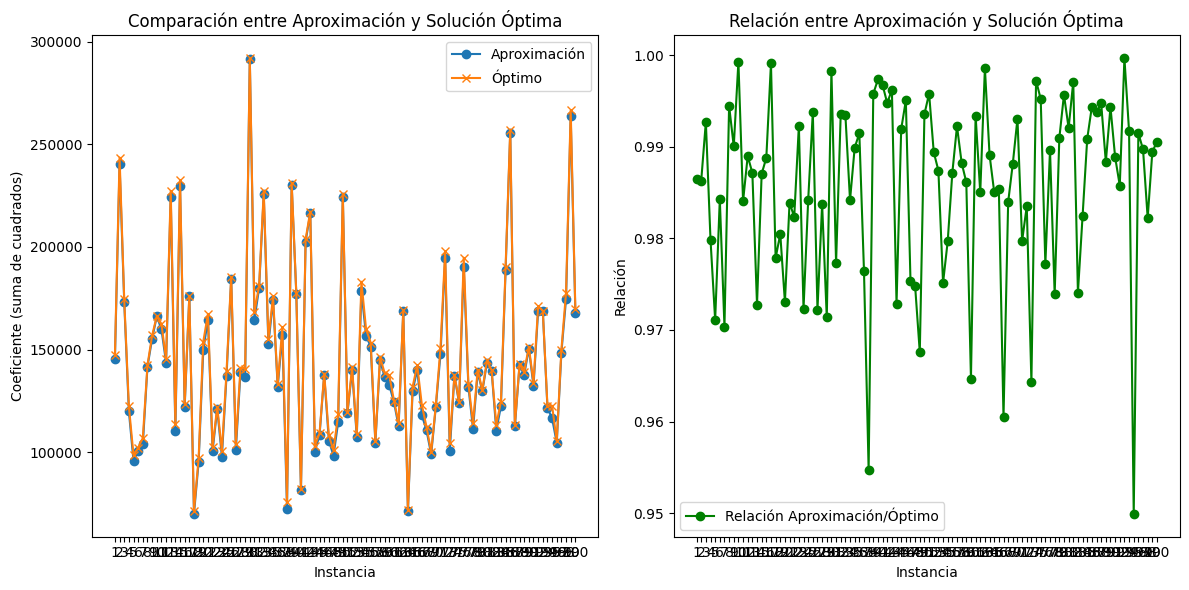

In [122]:
num_instancias = 100
num_maestros = 17
num_habilidades = 1000
k = 5

graficar_relacion_aleatoria(num_instancias, num_maestros, num_habilidades, k)